In [51]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
act_ca = pd.read_csv('data/act_2019_ca.csv')
sat_ca = pd.read_csv('data/sat_2019_ca.csv')
districts = pd.read_csv('data/pubdistricts.txt', sep = '\t')

Clean data

In [53]:
# Last row is empty
# print(act_ca.iloc[2309])
# act_ca.drop(index = 2309, inplace = True)

### County, district, school sizes

In [54]:
act_ca.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
RType,,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,57,57,57,57,57,57,58,0
D,522,522,522,0,0,522,522,522,522,459,459,459,459,459,459,522,0
S,1728,1728,1728,1728,1728,1728,1728,1728,1728,1436,1436,1436,1436,1436,1436,1728,0
X,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [55]:
sat_ca.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
RType,,,,,,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,57,...,57,57,57,57,57,57,57,57,58,0
D,539,539,539,539,0,539,539,539,539,501,...,495,495,495,495,501,501,495,495,539,0
S,1981,1981,1981,1981,1981,1981,1981,1981,1981,1745,...,1716,1716,1716,1716,1745,1745,1716,1716,1981,0
X,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [56]:
act_ca = act_ca[act_ca['CDS'].notna()]
sat_ca = sat_ca[sat_ca['CDS'].notna()]

In [57]:
print(districts.shape)
districts.sample(5)

(1088, 24)


,CD Code,County,District,Street,City,Zip,State,MailStreet,MailCity,MailZip,...,Email,AdmFName,AdmLName,AdmEmail,Latitude,Longitude,DOC,DOCType,StatusType,LastUpDate
1077,5772686,Yolo,Esparto Unified,26675 Plainfield Street,Esparto,95627-2192,CA,26675 Plainfield Street,Esparto,95627-2192,...,cgoennier@eusdk12.org,Christina,Goennier,cgoennier@eusdk12.org,38.691545,-122.01615,54,Unified School District,Active,07/27/2020
717,4068759,San Luis Obispo,Lucia Mar Unified,602 Orchard Street,Arroyo Grande,93420-4000,CA,602 Orchard Street,Arroyo Grande,93420-4000,...,info@lmusd.org,Paul,Fawcett,paul.fawcett@lmusd.org,35.115363,-120.57605,54,Unified School District,Active,12/01/2020
76,810082,Del Norte,Del Norte County Office of Education,301 West Washington Boulevard,Crescent City,95531-8340,CA,301 West Washington Boulevard,Crescent City,95531-8340,...,jharris@delnorte.k12.ca.us,Jeff,Harris,jharris@delnorte.k12.ca.us,41.772734,-124.20591,0,County Office of Education (COE),Active,07/17/2019
646,3767991,San Diego,Cajon Valley Union,750 East Main Street,El Cajon,92020-4012,CA,PO Box 1007,El Cajon,92022-1007,...,No Data,David,Miyashiro,miyashirod@cajonvalley.net,32.795716,-116.95309,52,Elementary School District,Active,12/05/2019
145,1262703,Humboldt,Blue Lake Union Elementary,631 Greenwood Avenue,Blue Lake,95525-0268,CA,PO Box 268,Blue Lake,95525-0268,...,barwood@bluelakeschool.org,DeAnn,Waldvogel,dwaldvogel@bluelakeschool.org,40.885068,-123.99190,52,Elementary School District,Active,11/23/2019


Should be 1088 districts - only half take either SAT's or ACTs.

In [58]:
# But some districts have no high schools 
districts.iloc[543]

CD Code                          3166910
County                            Placer
District       Roseville City Elementary
Street                  1050 Main Street
City                           Roseville
Zip                           95678-2067
State                                 CA
MailStreet              1050 Main Street
MailCity                       Roseville
MailZip                       95678-2067
MailState                             CA
Phone                     (916) 771-1600
Ext                              No Data
FaxNumber                 (916) 771-1620
Email                            No Data
AdmFName                            Derk
AdmLName                          Garcia
AdmEmail              dgarcia@rcsdk8.org
Latitude                       38.751856
Longitude                      -121.3046
DOC                                   52
DOCType       Elementary School District
StatusType                        Active
LastUpDate                    02/10/2020
Name: 543, dtype

In [59]:
act_ca.set_index('CDS', inplace=True)
sat_ca.set_index('CDS', inplace = True)

In [60]:
act_size = act_ca[[]]
sat_size = sat_ca[['RType', 'Enroll12', 'Enroll11']]

In [61]:
act_size.shape, sat_size.shape

((2309, 0), (2579, 3))

In [62]:
df_all = pd.merge(act_size, sat_size, how = 'outer', 
                    left_index=True, right_index = True,
                    indicator=True) 
                    # entities with either act or sat
df_both = pd.merge(act_size, sat_size, how = 'inner',
                    left_index=True, right_index = True) # entities with both act and Sat

In [63]:
df_all.head()
# df_both.head()

,RType,Enroll12,Enroll11,_merge
CDS,,,,
0.000000e+00,X,489650.0,474843.0,both
1.000000e+12,C,17567.0,17191.0,both
1.100170e+12,D,170.0,175.0,both
1.100170e+12,S,84.0,92.0,both
1.100170e+12,S,9.0,16.0,right_only


In [64]:
df_all = df_all.combine_first(act_ca[['RType', 'Enroll12']]) 
# fill RType and Enroll12 columns

In [65]:
# ~df_all[df_all['Enroll12_x'] != df_all['Enroll12_y']].isna().any(axis = 1).any() 
# Enrollment numbers agree

In [66]:
# 280 entities are ACT only, 10 are SAT only
df_all['_merge'].value_counts()

both          2300
right_only     279
left_only        9
Name: _merge, dtype: int64

In [67]:
df_all.groupby(['_merge']).count()

,Enroll11,Enroll12,RType
_merge,,,
left_only,0,9,9
right_only,279,279,279
both,2300,2300,2300


In [68]:
df_all.groupby('_merge').mean()

,Enroll11,Enroll12
_merge,,
left_only,NaN,42.555556
right_only,41.774194,63.172043
both,814.455217,831.246957


(array([ 35.,  83., 428., 787., 971., 220.,  48.,  11.,   4.,   1.]),
 array([ 0.        ,  1.31014482,  2.62028963,  3.93043445,  5.24057927,
         6.55072409,  7.8608689 ,  9.17101372, 10.48115854, 11.79130335,
        13.10144817]),
 <BarContainer object of 10 artists>)

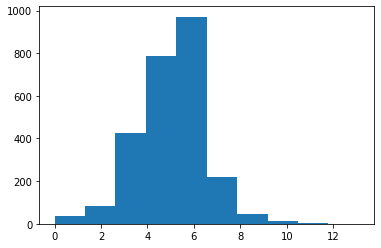

In [69]:
plt.hist(np.log(df_all['Enroll12'] + 1))

<AxesSubplot:>

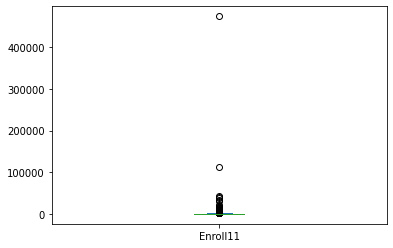

In [70]:
df_all['Enroll11'].plot(kind = 'box')

In [71]:
df_districts = df_all.query('RType == "D"')
df_districts.shape

(539, 4)

(array([  3.,  11.,  27.,  54., 117., 124., 122.,  70.,  10.,   1.]),
 array([ 0.        ,  1.06424204,  2.12848408,  3.19272612,  4.25696816,
         5.32121019,  6.38545223,  7.44969427,  8.51393631,  9.57817835,
        10.64242039]),
 <BarContainer object of 10 artists>)

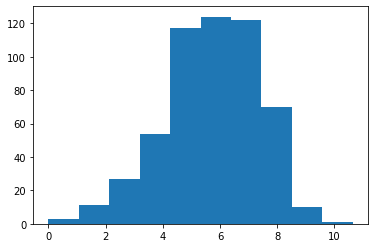

In [72]:
plt.hist(np.log(df_districts['Enroll12'] + 1))

<AxesSubplot:>

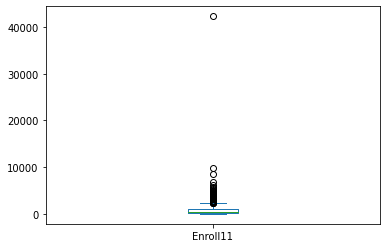

In [73]:
df_districts['Enroll11'].plot(kind = 'box')

In [74]:
np.exp([2.64, 8.24, 10.64])

array([1.40132036e+01, 3.78954031e+03, 4.17727712e+04])

Size is very inhomogeneous - even when we filter to only districts. Districts vary from 14 to more than 40,000 students.

(array([  3.,  11.,  27.,  54., 117., 124., 122.,  70.,  10.,   1.]),
 array([ 0.        ,  1.06424204,  2.12848408,  3.19272612,  4.25696816,
         5.32121019,  6.38545223,  7.44969427,  8.51393631,  9.57817835,
        10.64242039]),
 <BarContainer object of 10 artists>)

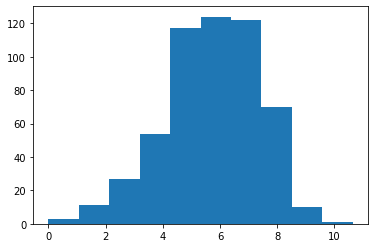

In [75]:
plt.hist(np.log(df_all.query('RType == "D"')['Enroll12'] + 1))

(array([ 25.,  13.,  27.,  77., 189., 268., 377., 307., 513., 194.]),
 array([0.        , 0.70352686, 1.40705372, 2.11058058, 2.81410744,
        3.5176343 , 4.22116116, 4.92468802, 5.62821488, 6.33174174,
        7.0352686 ]),
 <BarContainer object of 10 artists>)

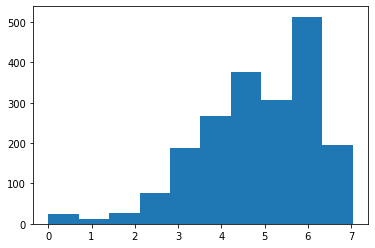

In [76]:
plt.hist(np.log(df_all.query('RType == "S"')['Enroll12'] + 1))

### Small Schools

In [78]:
act_big = act_ca.query('NumTstTakr >= 15')
act_small = act_big.query('Enroll12 >= 100')

In [79]:
act_small['RType'].value_counts()

S    915
D    337
C     53
X      1
Name: RType, dtype: int64

In [ ]:
act_ca.query('NumTstTakr == 0')
# act_ca.drop(index = act_ca.query('NumTstTakr == 0').index, inplace = True) # Drop entities with 0 test takers

,CDS,RType,Enroll12,NumTstTakr,NumGE21,PctGE21,Year
0,3.366993e+13,S,18.0,0.0,NaN,NaN,2018-19
1,1.964212e+13,S,58.0,0.0,NaN,NaN,2018-19
2,1.563776e+13,S,18.0,0.0,NaN,NaN,2018-19
17,5.472249e+13,S,78.0,0.0,NaN,NaN,2018-19
28,1.263032e+13,S,51.0,0.0,NaN,NaN,2018-19
...,...,...,...,...,...,...,...
2285,4.369674e+13,S,140.0,0.0,NaN,NaN,2018-19
2300,1.964733e+13,S,75.0,0.0,NaN,NaN,2018-19
2301,1.410140e+13,S,194.0,0.0,NaN,NaN,2018-19
2305,5.810588e+13,S,102.0,0.0,NaN,NaN,2018-19


In [ ]:
act_ca['is_small_sample'] = act_ca['PctGE21'] == "*"

In [ ]:
act_ca.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,is_small_sample
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,False
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,False
5,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2018-19,False
6,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2018-19,False
7,1.964246e+13,19.0,1964246.0,126003.0,S,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles,14.0,1.0,*,*,*,*,*,*,2018-19,True


In [ ]:
act_ca.query('PctGE21 == "*"')

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
7,1.964246e+13,19.0,1964246.0,126003.0,S,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles,14.0,1.0,*,*,*,*,*,*,2018-19
8,3.868478e+13,38.0,3868478.0,119958.0,S,Academy (The)- SF @McAteer,San Francisco Unified,San Francisco,84.0,9.0,*,*,*,*,*,*,2018-19
9,3.675077e+13,36.0,3675077.0,3631207.0,S,Academy for Academic Excellence,Apple Valley Unified,San Bernardino,97.0,13.0,*,*,*,*,*,*,2018-19
10,1.964733e+13,19.0,1964733.0,126573.0,S,Academy for Multilingual Arts and Science at M...,Los Angeles Unified,Los Angeles,141.0,10.0,*,*,*,*,*,*,2018-19
11,3.667736e+13,36.0,3667736.0,116723.0,S,Academy of Careers and Exploration,Helendale Elementary,San Bernardino,63.0,5.0,*,*,*,*,*,*,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,1.162661e+13,11.0,1162661.0,1132851.0,S,Willows High,Willows Unified,Glenn,115.0,5.0,*,*,*,*,*,*,2018-19
2288,5.772703e+13,57.0,5772702.0,5738505.0,S,Winters High,Winters Joint Unified,Yolo,102.0,6.0,*,*,*,*,*,*,2018-19
2296,4.369427e+13,43.0,4369427.0,4330015.0,S,Yerba Buena High,East Side Union High,Santa Clara,420.0,13.0,*,*,*,*,*,*,2018-19
2304,5.171465e+13,51.0,5171464.0,5130075.0,S,Yuba City Independence Academy,Yuba City Unified,Sutter,21.0,1.0,*,*,*,*,*,*,2018-19


In [ ]:
# act_ca = act_ca[act_ca['PctGE21'] != '*']

In [ ]:
act_raw.sort_values('Enroll12').head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
1103,2.000000e+12,2.0,0.0,0.0,C,NaN,NaN,Alpine,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1854,1.964733e+13,19.0,1964733.0,133280.0,S,PUC Nueva Esperanza Charter Academy,Los Angeles Unified,Los Angeles,0.0,22.0,16,15,17,16,1,4.55,2018-19,NaN
238,3.768213e+13,37.0,3768213.0,3730934.0,S,Campo High (Continuation),Mountain Empire Unified,San Diego,3.0,1.0,*,*,*,*,*,*,2018-19,NaN
336,3.166944e+13,31.0,3166944.0,3130192.0,S,Cold Stream Alternative,Tahoe-Truckee Unified,Placer,3.0,1.0,*,*,*,*,*,*,2018-19,NaN
314,3.768338e+13,37.0,3768338.0,124347.0,S,City Heights Preparatory Charter,San Diego Unified,San Diego,4.0,1.0,*,*,*,*,*,*,2018-19,NaN


Alpine county (https://en.wikipedia.org/wiki/Alpine_County%2C_California) population 1129 has no high school students in the county so we drop it.

In [ ]:
act_ca.drop(index = 1103, inplace=True)

##### Should we drop rows with no students taking test?
These are wanted for particpation metrics but not wanted for performance metrics

In [ ]:
act_ca['PctGE21'].isna().sum()
act_ca['PctGE21'].value_counts(dropna = False)

NaN      356
50.00     22
33.33     10
55.56      9
0.00       9
        ... 
6.56       1
8.00       1
80.81      1
24.53      1
57.58      1
Name: PctGE21, Length: 915, dtype: int64

In [ ]:
act_ca.query('PctGE21 == "*"')['RType'].value_counts()

S    420
D    109
C      3
Name: RType, dtype: int64

In [ ]:
act_ca.query('PctGE21 == "*"').describe()

,CDS,CCode,CDCode,SCode,Enroll12,NumTstTakr
count,5.320000e+02,532.000000,5.320000e+02,4.230000e+02,532.000000,532.000000
mean,3.011130e+13,29.475564,2.994964e+06,1.773292e+06,120.150376,5.364662
std,1.511053e+13,15.082740,1.523225e+06,1.995396e+06,138.146842,4.178966
min,1.611190e+12,1.000000,0.000000e+00,0.000000e+00,3.000000,1.000000
25%,1.964733e+13,19.000000,1.964733e+06,1.205385e+05,41.000000,2.000000
50%,3.266969e+13,32.000000,3.266969e+06,6.312590e+05,77.000000,4.000000
75%,4.024979e+13,40.000000,4.010405e+06,3.482215e+06,145.250000,9.000000
max,5.872737e+13,58.000000,5.872736e+06,6.120893e+06,1268.000000,14.000000


In [ ]:
# Counties have no Sname but do have a Scode
act_raw[act_raw['SCode'].notna() & act_raw['SName'].isna()]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
1064,3.400000e+13,34.0,0.0,0.0,C,NaN,NaN,Sacramento,19540.0,3065.0,21,20,21,21,1526,49.79,2018-19,NaN
1065,3.900000e+13,39.0,0.0,0.0,C,NaN,NaN,San Joaquin,11778.0,1348.0,22,21,21,21,693,51.41,2018-19,NaN
1066,1.500000e+13,15.0,0.0,0.0,C,NaN,NaN,Kern,14229.0,1257.0,21,20,20,20,544,43.28,2018-19,NaN
1067,4.500000e+13,45.0,0.0,0.0,C,NaN,NaN,Shasta,2161.0,173.0,26,24,24,24,131,75.72,2018-19,NaN
1068,5.100000e+13,51.0,0.0,0.0,C,NaN,NaN,Sutter,1827.0,196.0,23,22,22,22,117,59.69,2018-19,NaN
1069,5.000000e+12,5.0,0.0,0.0,C,NaN,NaN,Calaveras,451.0,31.0,26,24,24,24,27,87.10,2018-19,NaN
1070,2.600000e+13,26.0,0.0,0.0,C,NaN,NaN,Mono,420.0,20.0,26,24,24,24,16,80.00,2018-19,NaN
1071,5.600000e+13,56.0,0.0,0.0,C,NaN,NaN,Ventura,10750.0,1552.0,25,24,24,24,1086,69.97,2018-19,NaN
1072,2.100000e+13,21.0,0.0,0.0,C,NaN,NaN,Marin,2647.0,753.0,27,26,25,25,606,80.48,2018-19,NaN
1073,9.000000e+12,9.0,0.0,0.0,C,NaN,NaN,El Dorado,2226.0,465.0,25,24,25,24,358,76.99,2018-19,NaN
